Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Upon opening the dataset and by sorting by the largest order amounts, there are several outliers in the dataset. Specifically, Shop ID 78 sold shoes at a price of $25725 per pair of shoes. This is problematic as other shops sell shoes at a much lower price, in the hundreds. A better way to evaluate this data would be to account for the outliers and utilize a different measurement of central tendency.

In [7]:
#Importing tools required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read file
df = pd.read_csv("./data/dataset.csv", index_col="order_id")
#View first 5 entries of dataset
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11


The "naively" calculated AOV of $3145.13 was calculated by evaluating the mean of order_amount

In [8]:
#"Naive" calculation of AOV
df['order_amount'].mean()

3145.128

As stated before, a better way to evaluate the data would not to measure by mean but instead by mode as it is less affected by outliers in the data.

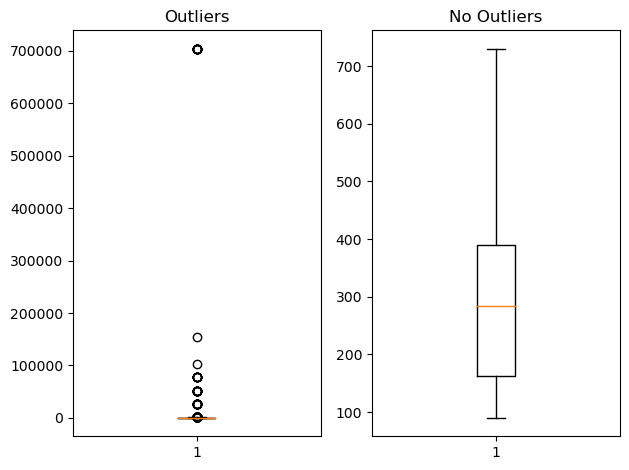

In [9]:
#Visualization
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df['order_amount'], showfliers=True)
ax[0].set_title("Outliers")
ax[1].boxplot(df['order_amount'], showfliers=False)
ax[1].set_title("No Outliers")
fig.tight_layout()
plt.show()

b.	What metric would you report for this dataset?

With the three main measures of central tendency (mode, median, and mean), I would utilize mode and measure the modal order value. This is because I want to measure the most frequently occuring numbers and it will not be as affected by outliers.

c.	What is its value?

In [21]:
df["order_amount"].mode()

0    153
dtype: int64

the modal order value is $153

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?
Query:

SELECT Orders.ShipperID, SUM(Orders.ShipperID), Shippers.ShipperName
FROM [Orders]
INNER JOIN Shippers ON Shippers.ShipperID=Orders.ShipperID
WHERE Orders.ShipperID=1

Answer: 54

b.	What is the last name of the employee with the most orders?
Query:

SELECT Count(Orders.EmployeeID), Orders.EmployeeID, Employees.LastName
FROM Orders
INNER JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID
GROUP BY Orders.EmployeeID
ORDER BY Count(Orders.EmployeeID) DESC

Answer: Peacock

c.	What product was ordered the most by customers in Germany?
Query:

SELECT Customers.Country, OrderDetails.ProductID, SUM(OrderDetails.Quantity) AS TotalOrders
FROM Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID
INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
WHERE Customers.Country = "Germany"
GROUP BY ProductID
ORDER BY SUM(OrderDetails.Quantity) DESC

Answer: Boston Crab Meat, 160
